170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 55ms/step - accuracy: 0.3453 - loss: 1.7703 - val_accuracy: 0.5115 - val_loss: 1.3439
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 122s 43ms/step - accuracy: 0.5607 - loss: 1.2254 - val_accuracy: 0.6031 - val_loss: 1.1164
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.6210 - loss: 1.0690 - val_accuracy: 0.6476 - val_loss: 1.0097
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.6610 - loss: 0.9575 - val_accuracy: 0.6717 - val_loss: 0.9390
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.6925 - loss: 0.8790 - val_accuracy: 0.6812 - val_loss: 0.9360
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 43ms/step - accuracy: 0.7134 - loss: 0.8213 - val_accuracy: 0.6897 - val_loss: 0.9023
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 43ms/step - accuracy: 0.7320 - loss: 0.7640 - val_accuracy: 0.6895 - val_loss: 0.8972
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 68s 43ms/step - accuracy: 0.7433 

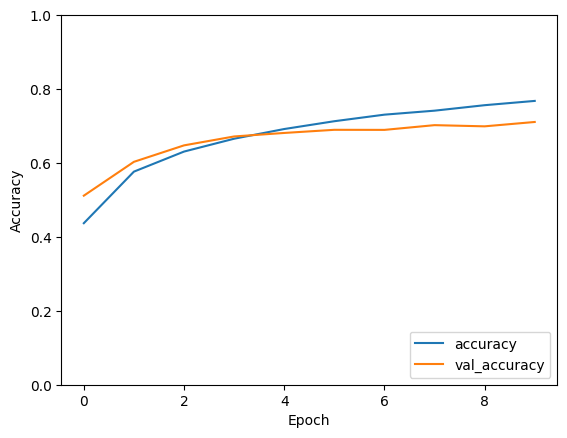

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


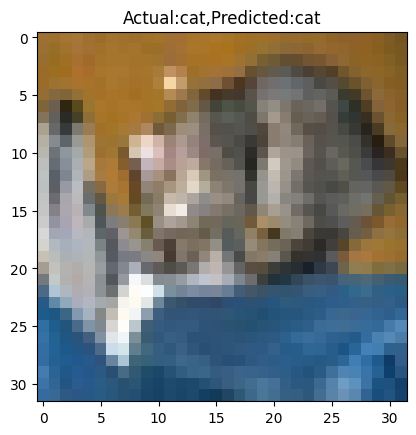

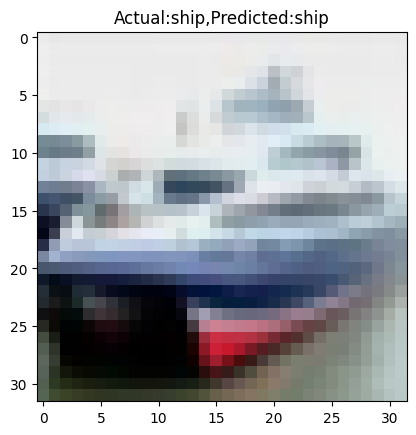

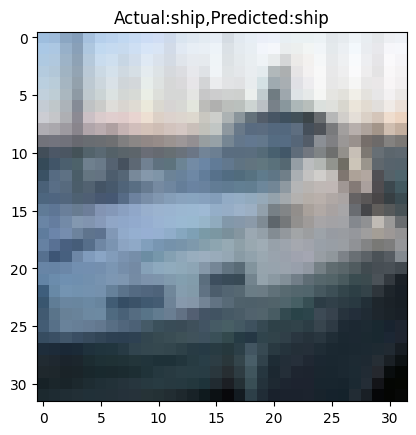

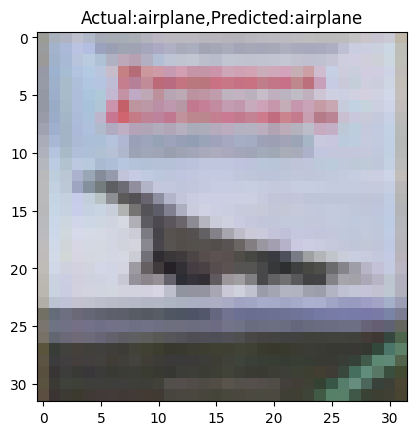

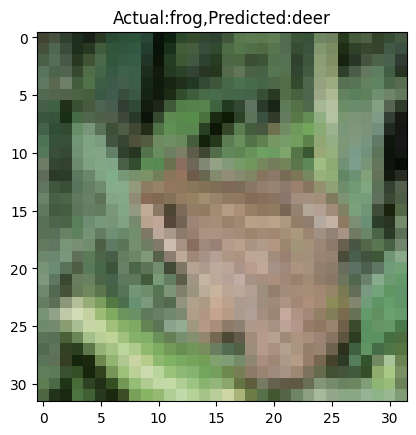

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,layers,models
from tensorflow.keras.utils import to_categorical
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,epochs=10,validation_data=(x_test,y_test))
test_loss,test_acc=model.evaluate(x_test,y_test,verbose=2)
print(f'Test accuracy:{test_acc:.4f}')
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0,1])
plt.legend(loc='lower right')
plt.show()
y_pred=model.predict(x_test)
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
for i in range(5):
    plt.imshow(x_test[i])
    plt.title(f"Actual:{class_names[np.argmax(y_test[i])]},Predicted:{class_names[np.argmax(y_pred[i])]}")
    plt.show()